> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 변수변환

## 설명변수 변환

In [2]:
wind <- read.csv("wind.csv")
head(wind)

,i,x,y
,<int>,<dbl>,<dbl>
1,1,5.0,1.582
2,2,6.0,1.822
3,3,3.4,1.057
4,4,2.7,0.500
5,5,10.0,2.236
6,6,9.7,2.386


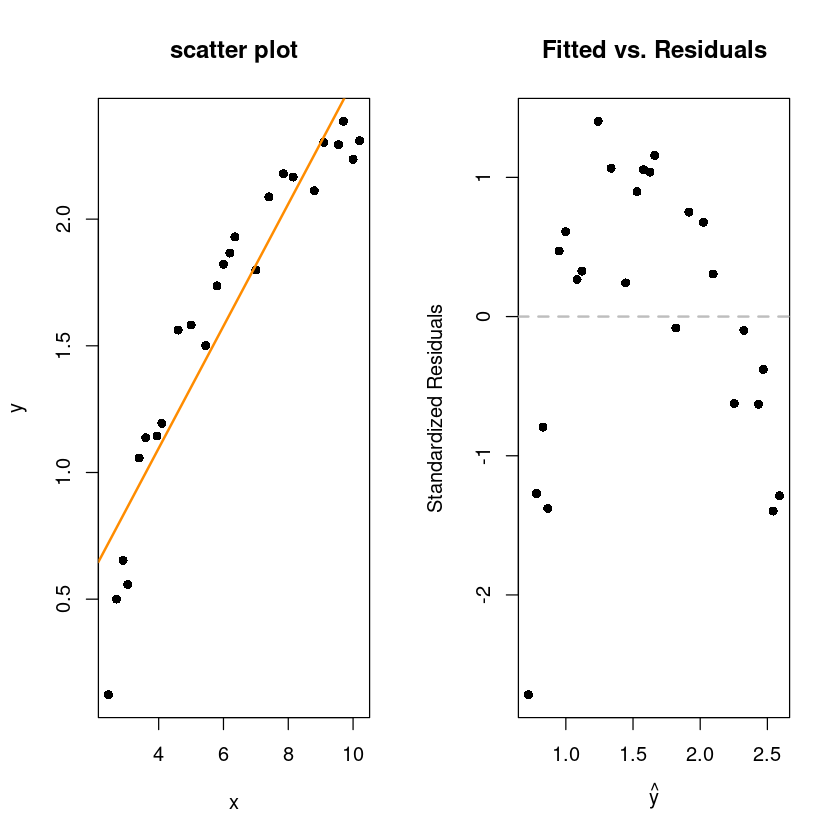

In [4]:
par(mfrow=c(1,2))
plot(y~x, wind, pch=16, main="scatter plot") 
abline(wind_fit, col='darkorange', lwd=2)

plot(fitted(wind_fit), rstandard(wind_fit),  pch = 16,
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals",  
     main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

- 산점도를 봤을때 직선보다는 곡선이 어울려 보이는 산점도

- 표준화된잔차를 봐도 선형성(2차)이 보인다.

### lm1

$y=\beta_0+\beta_1x+\epsilon$

In [3]:
wind_fit <- lm(y~x, wind) 
summary(wind_fit)


Call:
lm(formula = y ~ x, data = wind)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59869 -0.14099  0.06059  0.17262  0.32184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13088    0.12599   1.039     0.31    
x            0.24115    0.01905  12.659 7.55e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2361 on 23 degrees of freedom
Multiple R-squared:  0.8745,	Adjusted R-squared:  0.869 
F-statistic: 160.3 on 1 and 23 DF,  p-value: 7.546e-12


In [5]:
print(paste0("coefficient of determination : ", round(summary(wind_fit)$r.squared,3)))

[1] "coefficient of determination : 0.874"


- 단순선형회귀

In [6]:
print(paste0("RMSE : ", round(summary(wind_fit)$sigma,3)))

[1] "RMSE : 0.236"


### lm2

$y=\beta_0+\beta_1x+\beta_2x^2+\epsilon$

In [7]:
wind_fit_2 <- lm(y~x+I(x^2), wind) 
summary(wind_fit_2)


Call:
lm(formula = y ~ x + I(x^2), data = wind)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26347 -0.02537  0.01264  0.03908  0.19903 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.155898   0.174650  -6.618 1.18e-06 ***
x            0.722936   0.061425  11.769 5.77e-11 ***
I(x^2)      -0.038121   0.004797  -7.947 6.59e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1227 on 22 degrees of freedom
Multiple R-squared:  0.9676,	Adjusted R-squared:  0.9646 
F-statistic: 328.3 on 2 and 22 DF,  p-value: < 2.2e-16


- $x^2$을 넣었더니 모형도 유의하고 $R^2$의 값도 커짐

- 두개 변수 모두 유의함

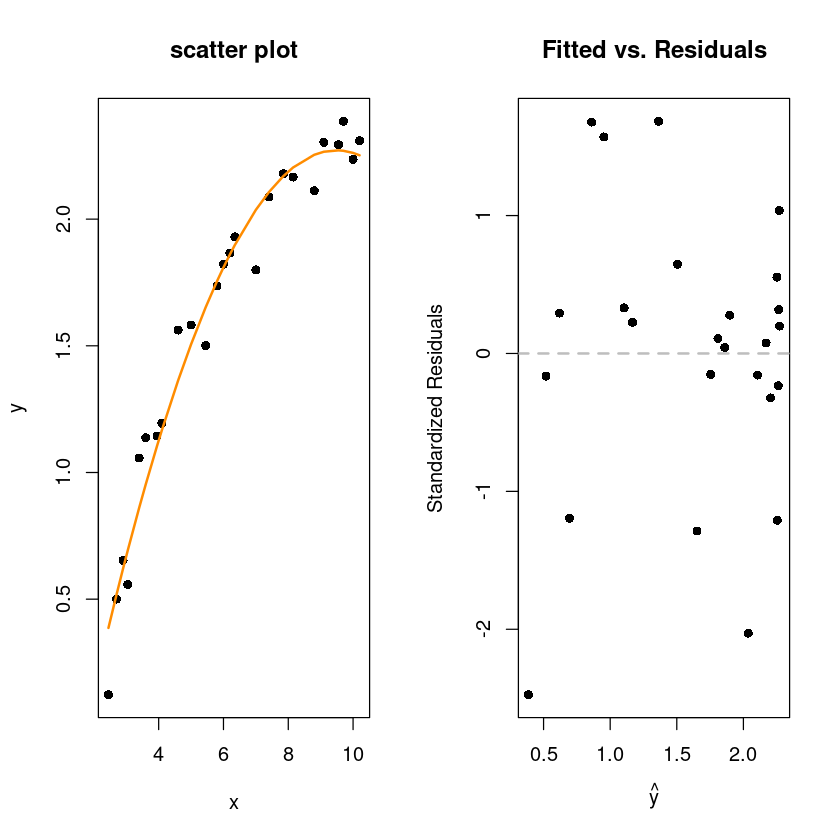

In [8]:
par(mfrow=c(1,2))
plot(y~x, wind, pch=16, main="scatter plot")
x_new <- sort(wind$x)
lines(x_new, predict(wind_fit_2, newdata = data.frame(x=x_new)), col='darkorange', lwd=2)

plot(fitted(wind_fit_2), rstandard(wind_fit_2),  pch = 16,
      xlab = expression(hat(y)), 
      ylab = "Standardized Residuals",  
      main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

- fitted line이 데이터를 잘 훑는 거 같이 보인다.

In [9]:
print(paste0("coefficient of determination : ", round(summary(wind_fit_2)$r.squared,3)))

[1] "coefficient of determination : 0.968"


In [10]:
print(paste0("RMSE : ", round(summary(wind_fit_2)$sigma,3)))

[1] "RMSE : 0.123"


### lm3

$y=\beta_0+\beta_1 \dfrac{1}{x}+\epsilon=\beta_0+\beta_1 x^`+\epsilon$

In [12]:
wind_fit_3 <- lm(y~I(1/x), wind) 
summary(wind_fit_3)


Call:
lm(formula = y ~ I(1/x), data = wind)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20547 -0.04940  0.01100  0.08352  0.12204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9789     0.0449   66.34   <2e-16 ***
I(1/x)       -6.9345     0.2064  -33.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09417 on 23 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9792 
F-statistic:  1128 on 1 and 23 DF,  p-value: < 2.2e-16


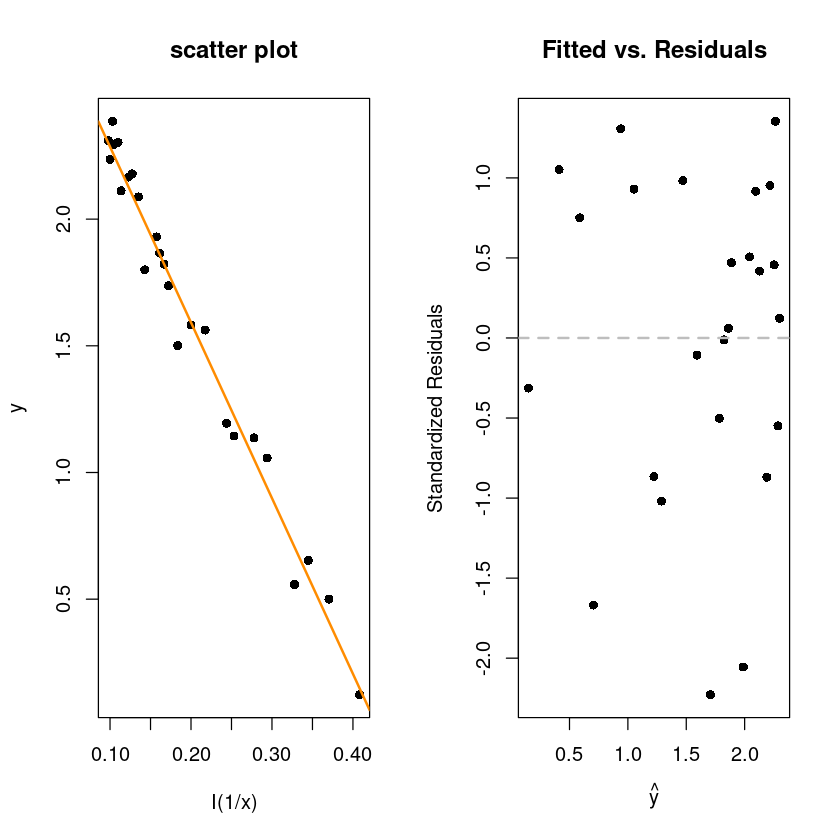

In [13]:
par(mfrow=c(1,2))
plot(y~I(1/x), wind, pch=16, main="scatter plot") 
abline(wind_fit_3, col='darkorange', lwd=2)

plot(fitted(wind_fit_3), rstandard(wind_fit_3),  pch = 16,
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals",  
     main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

In [14]:
print(paste0("coefficient of determination : ", round(summary(wind_fit_3)$r.squared,3)))

[1] "coefficient of determination : 0.98"


In [15]:
print(paste0("RMSE : ", round(summary(wind_fit_3)$sigma,3)))

[1] "RMSE : 0.094"


## 반응변수 변환

In [16]:
initech <- read.csv("initech.csv")
head(initech)

,years,salary
,<int>,<int>
1,1,41504
2,1,32619
3,1,44322
4,2,40038
5,2,46147
6,2,38447


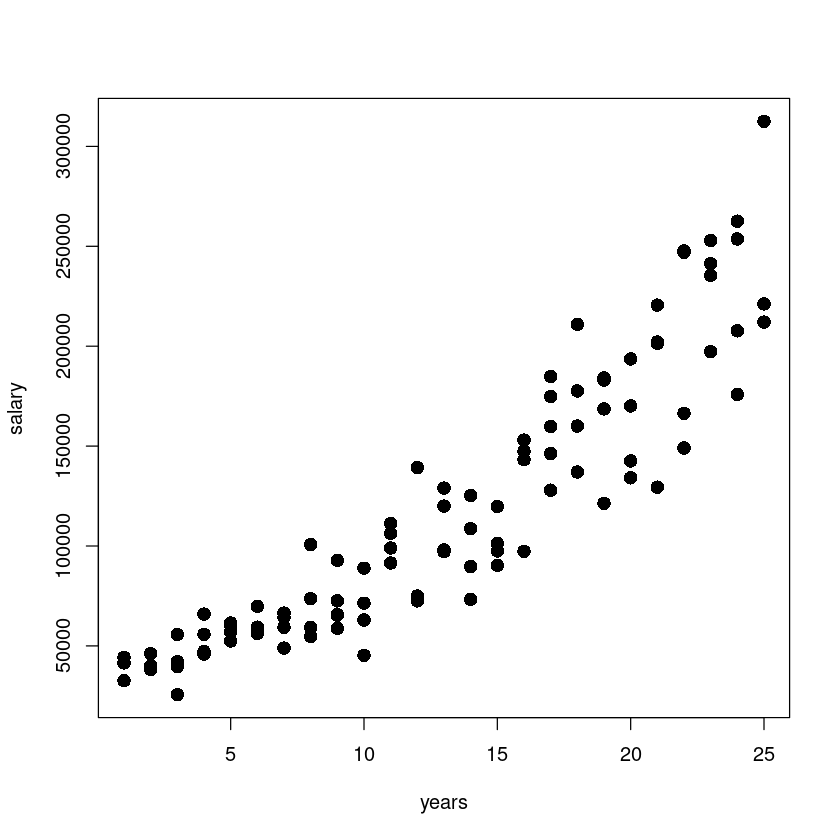

In [17]:
par(mfrow=c(1,1))
plot(salary~years, initech,  pch=16, cex=1.5)

- 곡선 관계!?

- x가 증가하면서 y값이 점점 퍼지고 있다. x가 증가할수록 salary의 분산이 커지고 있다.

### LM1

$y=\beta_0+\beta_x+\epsilon$

In [19]:
initech_fit <- lm(salary~years, initech) 
summary(initech_fit)


Call:
lm(formula = salary ~ years, data = initech)

Residuals:
   Min     1Q Median     3Q    Max 
-57225 -18104    241  15589  91332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5302       5750   0.922    0.359    
years           8637        389  22.200   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27360 on 98 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8324 
F-statistic: 492.8 on 1 and 98 DF,  p-value: < 2.2e-16


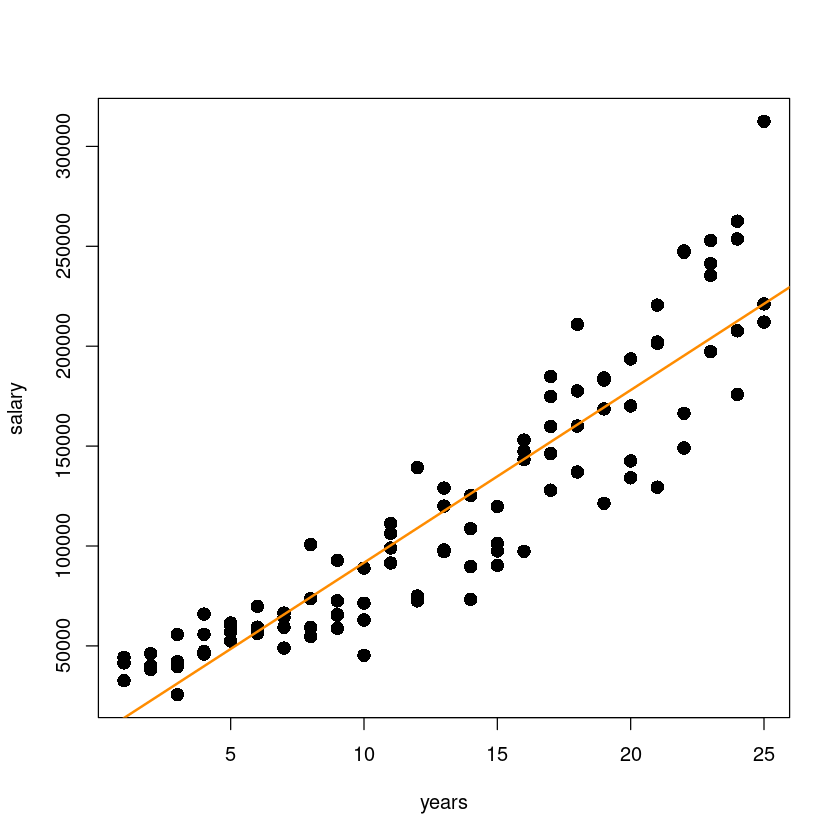

In [20]:
plot(salary~years, initech,
        pch=16, cex=1.5)
abline(initech_fit, col='darkorange', lwd=2)

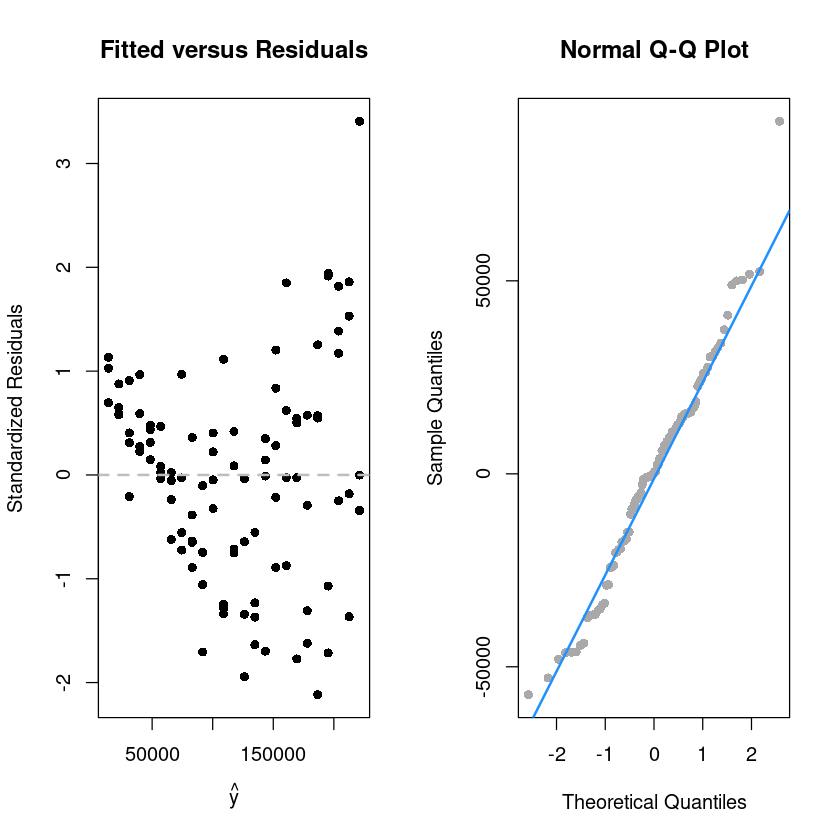

In [21]:
par(mfrow=c(1,2))

plot(fitted(initech_fit), rstandard(initech_fit),  pch = 16,
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals",  
     main = "Fitted versus Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

qqnorm(resid(initech_fit), pch=16,
          main = "Normal Q-Q Plot", col = "darkgrey") 
qqline(resid(initech_fit), col = "dodgerblue", lwd = 2)

- 잔차게 넓게 퍼져있음

In [23]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [24]:
dwtest(initech_fit, alternative = "two.sided") 


	Durbin-Watson test

data:  initech_fit
DW = 1.3313, p-value = 0.0004993
alternative hypothesis: true autocorrelation is not 0


- 등분산성 만족하지 않는다.

- 변수변환(log y),WLSE -> GLS 를 한다.

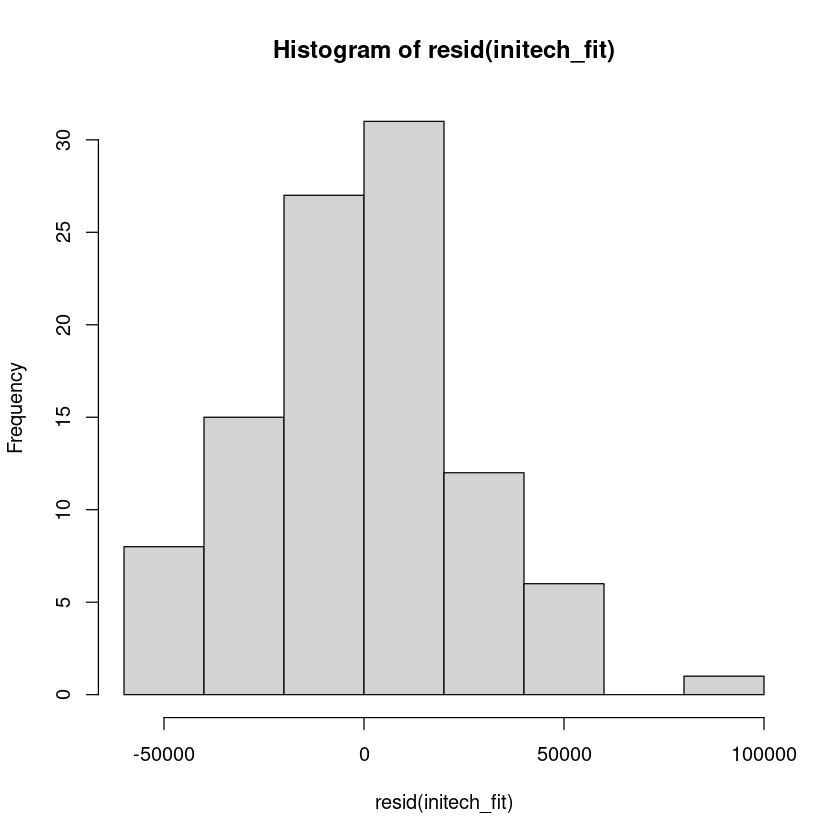

In [26]:
hist(resid(initech_fit))

### LM2(반응변수 변환)

In [27]:
initech_fit_log = lm(log(salary) ~ years, data = initech) 
summary(initech_fit_log)


Call:
lm(formula = log(salary) ~ years, data = initech)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57022 -0.13560  0.03048  0.14157  0.41366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.48381    0.04108  255.18   <2e-16 ***
years        0.07888    0.00278   28.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1955 on 98 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8904 
F-statistic: 805.2 on 1 and 98 DF,  p-value: < 2.2e-16


- 로그변환을 한 모형이므로 RMSE가 작다고 엇 작네 하면 안돼 .y를 예측하는 것과 y`을 예측하는것은 다르다.

- $log \hat y = \hat y^` = \hat \beta_0 + \hat \beta_1 x_1$

- $\rightarrow \hat y = exp(\hat y^`)$ 역변환 해줘야함

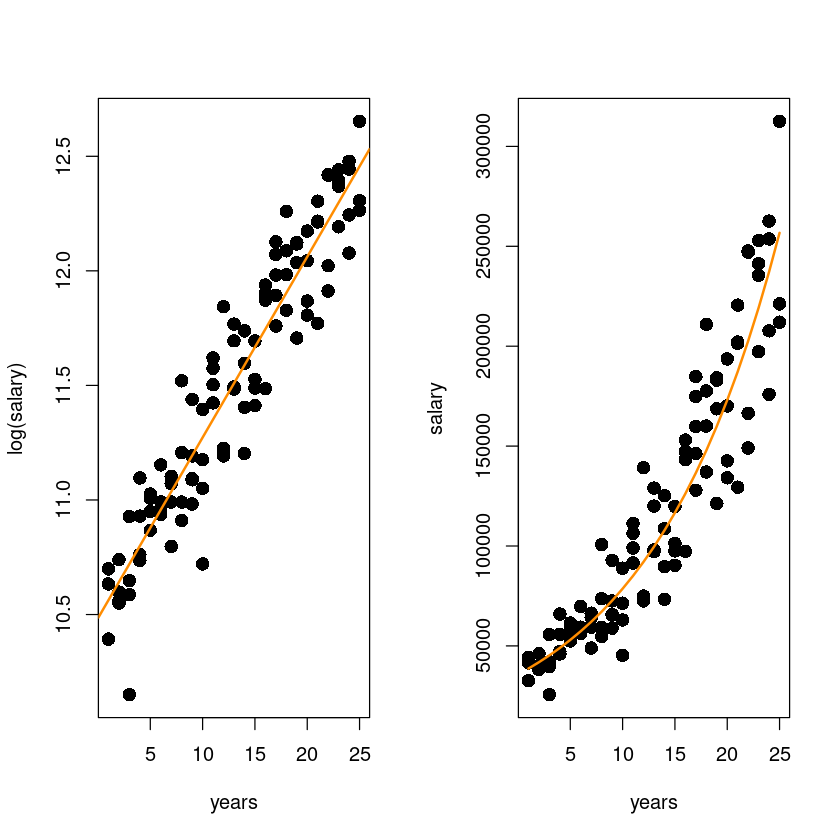

In [28]:
par(mfrow=c(1,2))
plot(log(salary)~years, initech,
        pch=16, cex=1.5)
abline(initech_fit_log, col='darkorange', lwd=2)

plot(salary~years, initech,pch=16, cex=1.5)
lines(initech$years,exp(fitted(initech_fit_log)), col="darkorange", lwd=2)

- 왼쪽 그림: $\hat y^` = \hat {log y}$

- 오른쪽 그림: $\hat y = exp(\hat \beta_0 + \hat \beta_1x)$

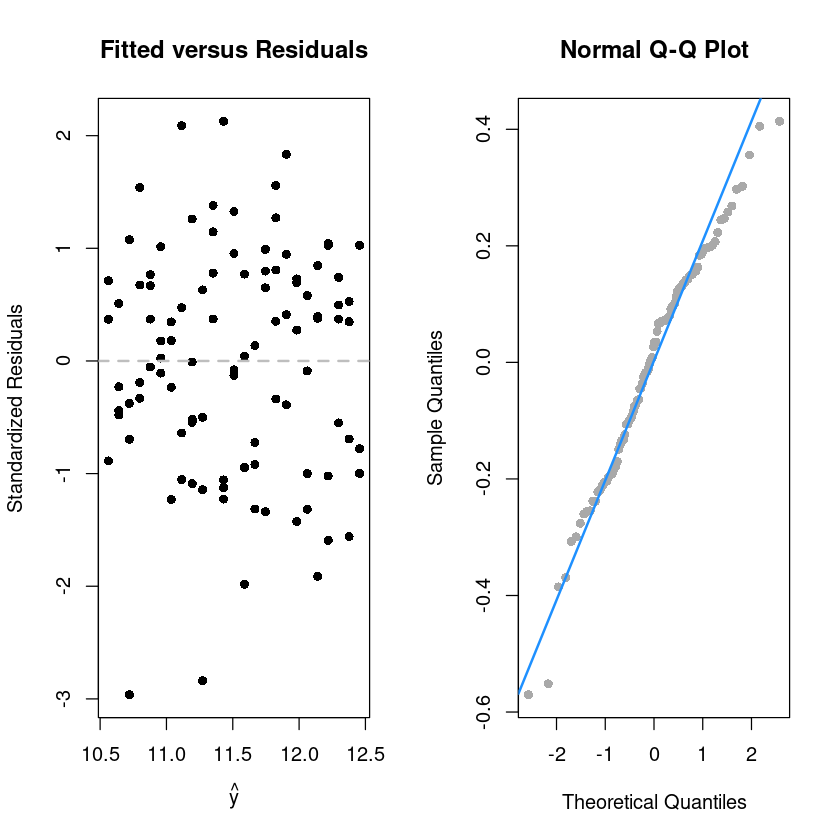

In [29]:
par(mfrow=c(1,2))

plot(fitted(initech_fit_log), rstandard(initech_fit_log),  pch = 16,
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals",  
     main = "Fitted versus Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

qqnorm(resid(initech_fit_log), pch=16,
          main = "Normal Q-Q Plot", col = "darkgrey")
qqline(resid(initech_fit_log), col = "dodgerblue", lwd = 2)

### 정리

$y=\beta_0+\beta_x+\epsilon$

In [30]:
summary(initech_fit)$sigma

[1] 27355.09

$log y = \beta_0+\beta_1x+\epsilon$

In [31]:
summary(initech_fit_log)$sigma

[1] 0.1954551

- 값 작게 나왔다고 더 좋은 모형인거 아님! 변환을 다시 해야함.

$\sqrt{MSE}=\hat \sigma$  -LM1

In [36]:
sqrt(sum((initech$salary - fitted(initech_fit)) ^ 2)/98) 

[1] 27355.09

$\sqrt{MSE}=\hat \sigma$  -LM2

In [37]:
sqrt(sum((initech$salary - exp(fitted(initech_fit_log))) ^ 2)/98)

[1] 24526.87

$y-(exp(\hat{log y})=\hat y)$

- MSE를 보면 조오금 줄어들었다.

## boxcox변환

$y'=log y$

log변환은 앞쪽은 작게 압축시키고 뒤쪽은 확 압축시킴

log변환과 다르게 덜 압축하는 방법??? sqrt로 압축..

지수변환 $\lambda$파라미터를 이용해서 변환.. (일반화..)

$$y'=g_{\lambda}(y)= \begin{cases} \dfrac{y^{\lambda}-1}{\lambda} & \lambda \neq 0 \\ log y & \lambda=0 \end{cases}$$

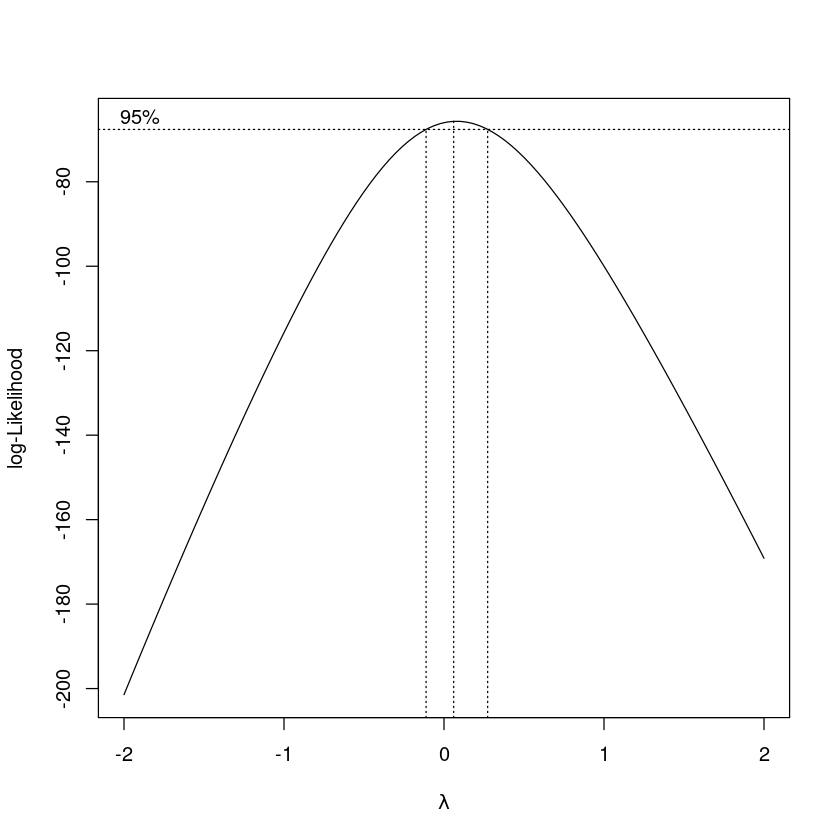

In [34]:
library(MASS)
boxcox(initech_fit, plotit = TRUE)

- (-2,2)가 기본으로 보여줌

- 0을 좌우로 점선은 $\lambda$의 95% 신뢰구간

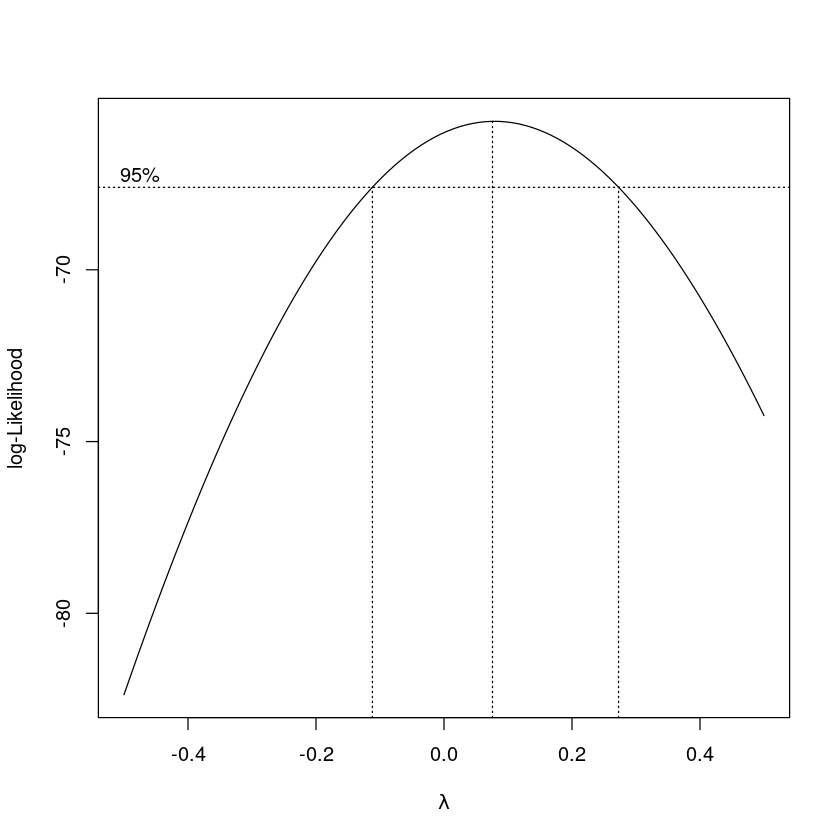

In [35]:
boxcox(initech_fit, plotit = TRUE, lambda = seq(-0.5,0.5, by = 0.1))

- log-Likeilihood를 이용하여 가장 큰 $\lambda$를 찾아준다.

- $\lambda$를 결정해주는 함수->boxcox

- 가장 큰 $\hat \lambda$ 은 0.08... 근데 의미가 없음.. 신뢰구간에 0이 들어가있네? 0은 로그변환이니까 0도 괜찮겠다! 